**Let's take an overview**

In [94]:
import pandas as pd
file = "C:\\Users\\keert\\Downloads\\un-general-debates-blueprint (1).csv"
df = pd.read_csv(file)

df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


**Stopwords**

In [78]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{"you'll", 'having', 'ours', 'few', 'until', 'she', 'shouldn', "shouldn't", 'does', 'and', 'on', 'under', 'why', 'theirs', 'my', 'the', 'for', 'any', 'wouldn', "you're", 'needn', 'this', "it's", 'to', 'most', 'about', "hasn't", 'just', 'didn', 'itself', 'hasn', 'couldn', 'ain', 'y', 'into', 'below', "wasn't", 'him', 'between', 'such', 'they', "won't", 'or', "weren't", 'himself', 'then', 'being', 'nor', 'an', 'down', 'other', 'of', 'been', 'were', 'hers', 'all', 'too', "you've", 'can', "you'd", 'o', 're', 'in', "wouldn't", 'm', 'do', "should've", "mightn't", 'your', 'am', "aren't", 'out', 'yours', 'very', 'his', 'i', 'more', 'not', 'here', 'll', 'herself', "needn't", 'hadn', 'what', 'weren', 'had', 'their', 's', 'her', 'should', 'themselves', 'at', 've', 'over', 'some', 'further', 'during', 'these', 'that', 'we', 'haven', 'no', 'wasn', 'against', "that'll", 'shan', 'above', 'same', 'aren', 'which', "doesn't", 'after', 'isn', "didn't", 'up', "hadn't", 'once', "don't", 'won', 'whom', 'our

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Regex**

In [79]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
  tokens = text
  for fun in pipeline:
    tokens = fun(tokens)
  return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

**Counting and Displaying Token Frequencies in a Pandas DataFrame**

In [5]:
import pandas as pd
from collections import Counter

# Assuming df is your DataFrame with a column named 'tokens'
# Replace this sample data with your actual DataFrame
data = {'tokens': ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']}
df = pd.DataFrame(data)

counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df[freq_df['freq'] >= 1]
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)


,freq
tokens,
a,10
p,6
n,5
e,4
l,3
b,2
o,1
r,1
g,1


**Word Cloud**

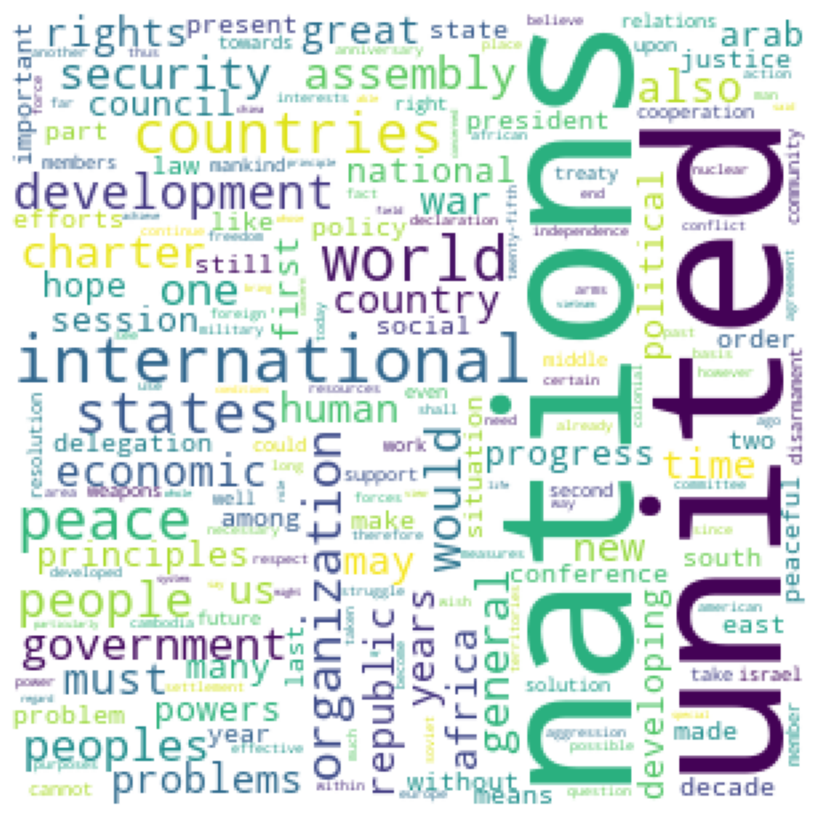

In [81]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [82]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


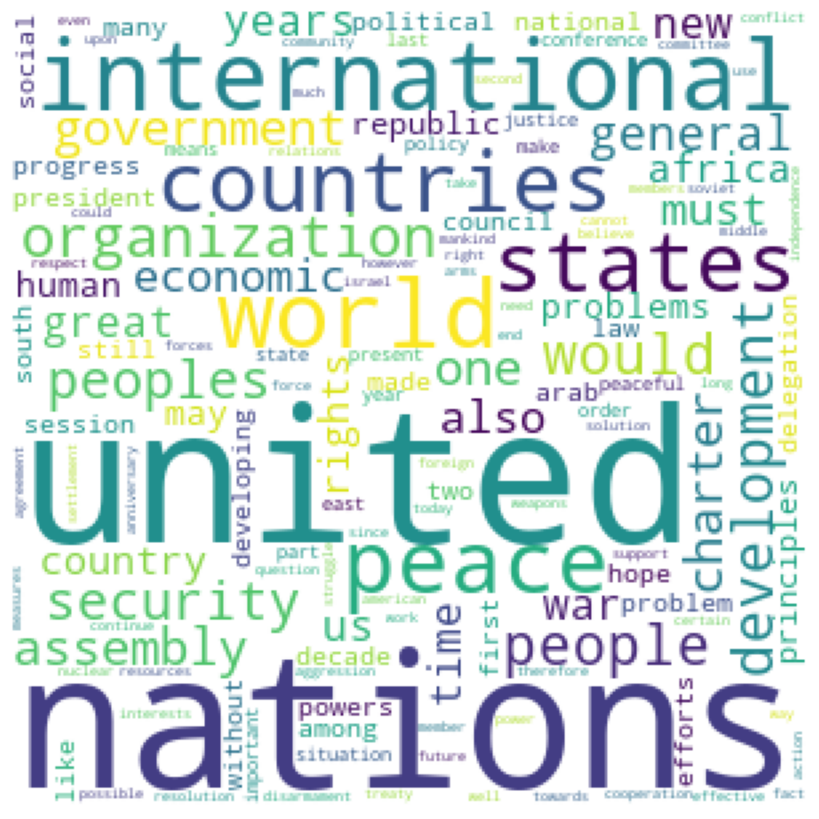

In [83]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**"Calculating TF-IDF Scores"**

In [84]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
# count token
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [85]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,1997,199.7
united,1996,199.6
international,1251,125.1
world,1093,109.3
peace,970,97.0


In [92]:
df= df[df['year']==1970]
df.head(20)

,session,year,country,country_name,speaker,position,text,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...","[doubt, us, coming, rostrum, wonders, usefulne...",2064
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...,"[today, mourning, untimely, death, president, ...",2829
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...,"[wish, congratulate, president, well-deserved,...",2543
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all...","[mr, president, like, first, congratulate, una...",1964
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...,"[general, assembly, fortunate, indeed, preside...",878
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...,"[year, ago, came, acting, president, organizat...",1387


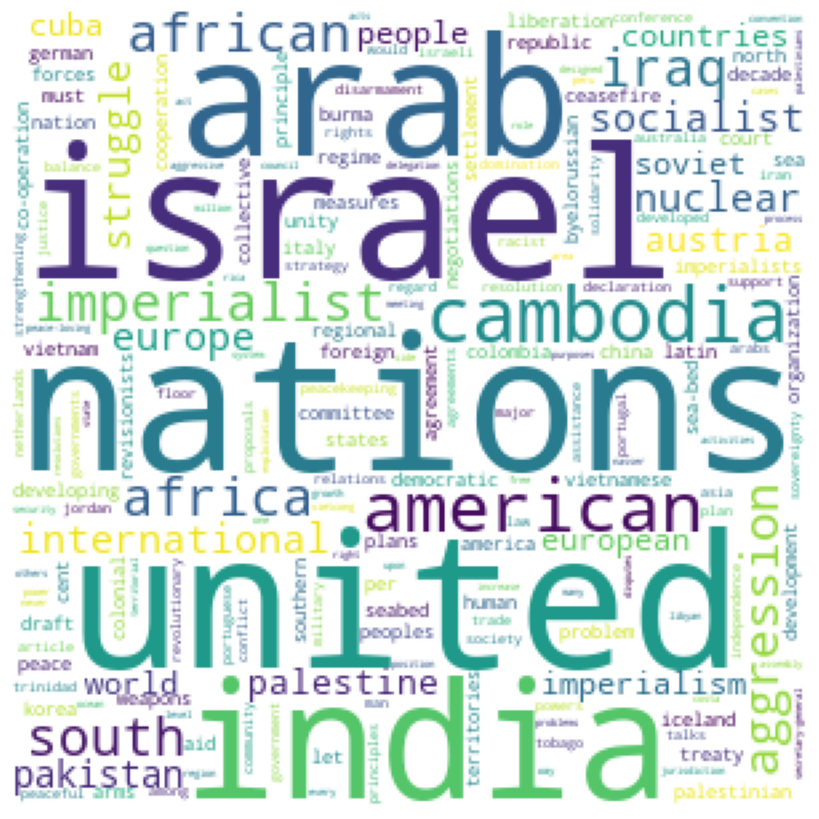

In [86]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**"Counting Specific Keywords"**

In [87]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [88]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True) 
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] 
# copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

In [90]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


**"Visualizing Keyword Frequencies Over Time with a Heatmap in Python"**

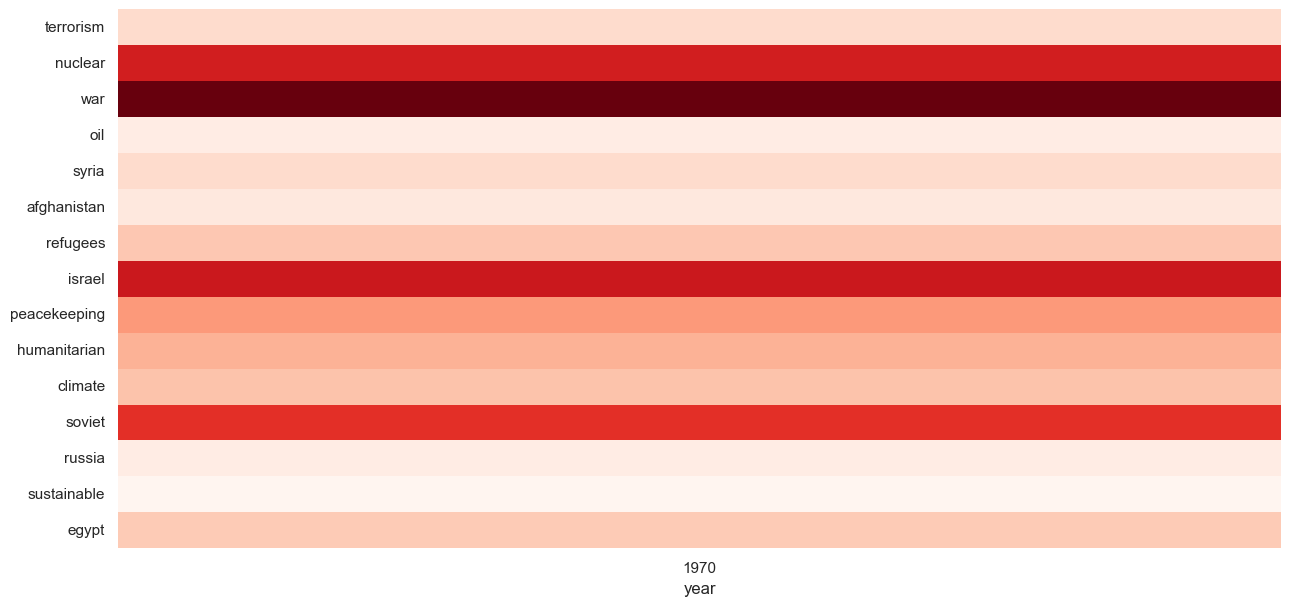

In [91]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)
